In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_regression, chi2, SelectKBest
from sklearn.cross_decomposition import PLSRegression

In [3]:
train = pd.read_csv('../data/tabular-playground-series-aug-2021/train.csv', index_col='id')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 249999
Columns: 101 entries, f0 to loss
dtypes: float64(95), int64(6)
memory usage: 194.5 MB


In [5]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
id,,,,,,,,,,,,,,,,,,,,,
0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


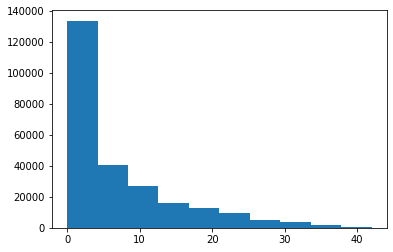

In [6]:
_ = plt.hist(train.loss)

In [7]:
features = train.columns.values[:-1]
target = train.columns.values[-1]

In [8]:
param_grid = {'gradientboostingregressor__max_leaf_nodes': [2, 3, 4, None]}

In [9]:
scaler = StandardScaler()
pls = PLSRegression(n_components=3)
pipe = make_pipeline(scaler, pls)

# gscv = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2)

In [11]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('plsregression', PLSRegression(n_components=3))])

In [12]:
test = pd.read_csv('../data/tabular-playground-series-aug-2021/test.csv', index_col='id')

In [13]:
y_pred = pipe.predict(X_test)

(array([1.0000e+01, 1.8500e+02, 1.6170e+03, 7.0850e+03, 1.5138e+04,
        1.5618e+04, 7.8770e+03, 2.1150e+03, 3.2400e+02, 3.1000e+01]),
 array([ 3.10261519,  3.83389445,  4.5651737 ,  5.29645295,  6.0277322 ,
         6.75901145,  7.4902907 ,  8.22156995,  8.9528492 ,  9.68412845,
        10.4154077 ]),
 <a list of 10 Patch objects>)

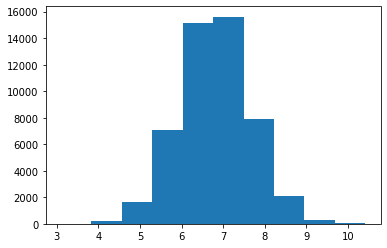

In [14]:
plt.hist(y_pred)

In [15]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.9173879241812655

In [16]:
# gscv.best_params_

In [17]:
pipe.fit(train[features], train[target])

test['loss'] = pipe.predict(test[features])

test[['loss']].to_csv('../submission.csv')